In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("hyundi.csv")

In [72]:
data
# We need to narmalize mileage/mpg/engineSize

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


In [73]:
print(data.isnull().sum())


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64


In [74]:
data.describe()


,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


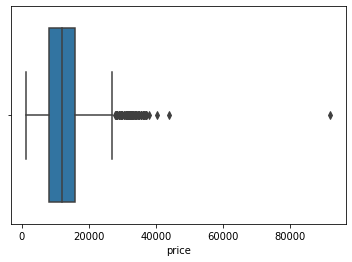

In [75]:
#sns.set_theme(style="whitegrid")
sns.boxplot(x=data["price"])

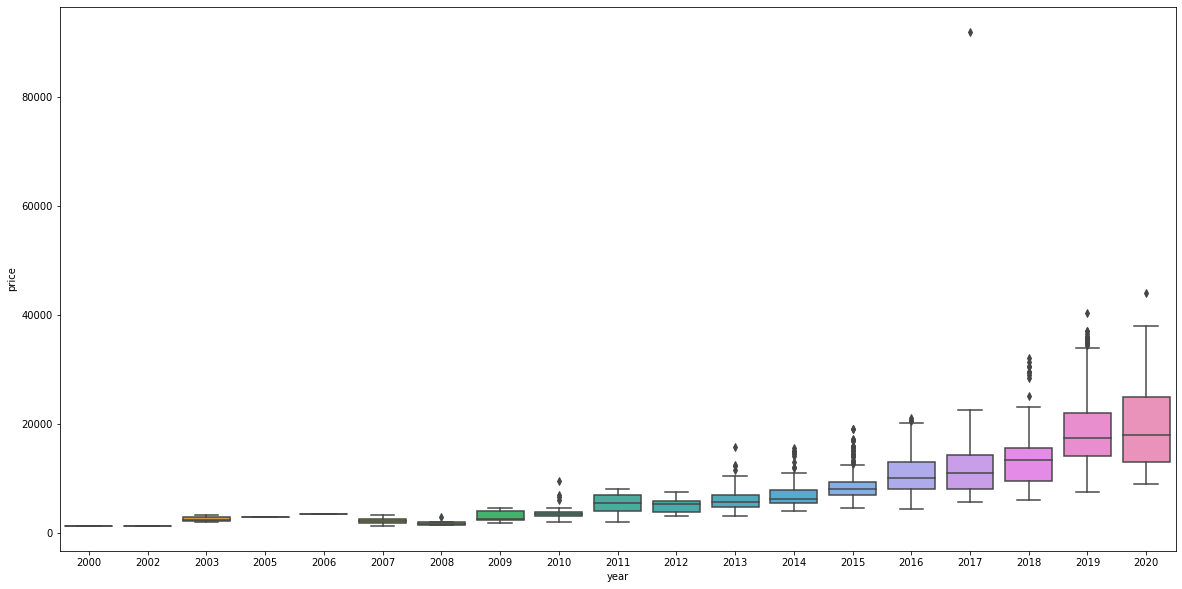

In [76]:
plt.figure(figsize=(20,10))

sns.boxplot(x="year", y="price", data=data)

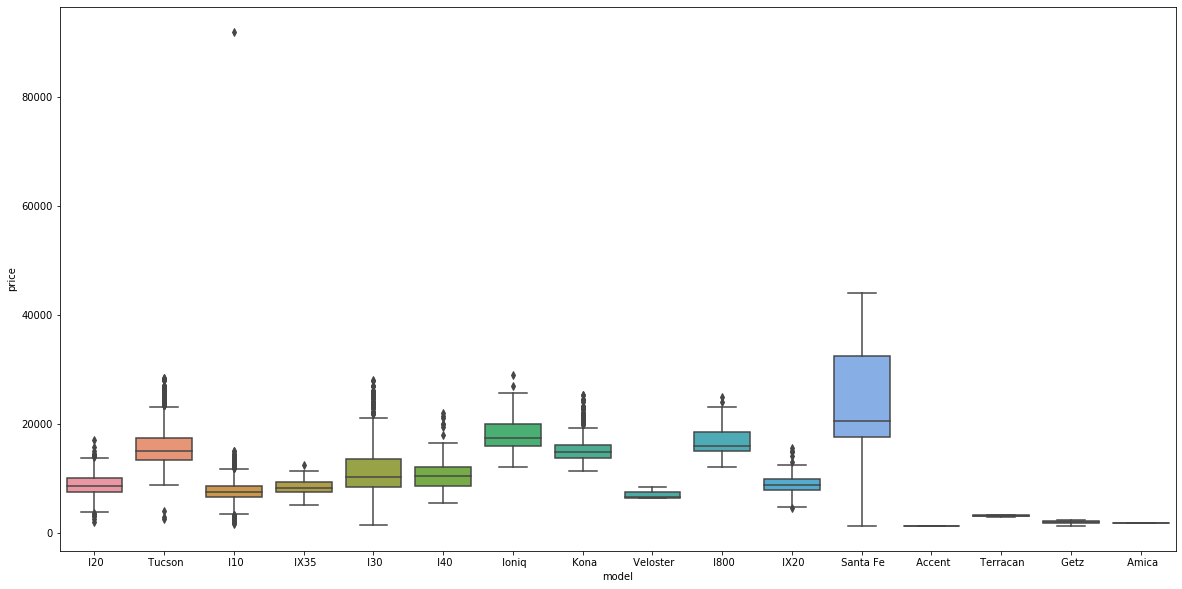

In [77]:
plt.figure(figsize=(20,10))

sns.boxplot(x="model", y="price", data=data)

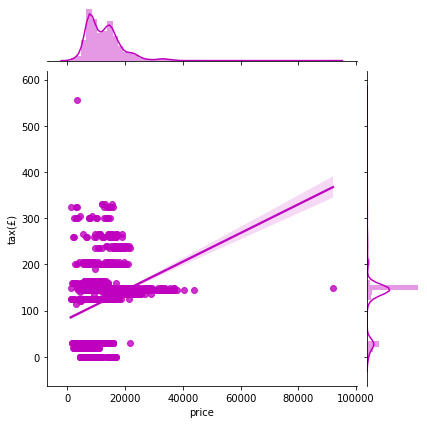

In [78]:
sns.jointplot(x="price", y="tax(£)", data=data,
                  kind="reg",
                  color="m")

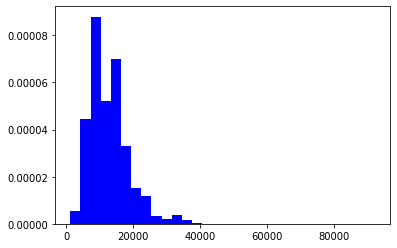

Skewness: 1.5885714727395455
Kurtosis: 7.968769386201491


In [79]:
plt.hist(data["price"].values, color = "blue", bins=30,density = True  )
plt.show()

# A positive skewness value in the output indicates an asymmetry in the distribution corresponding to row 3 and the tail is larger towards the right hand side of the distribution.
print("Skewness: " + str(data['price'].skew()))

#
print("Kurtosis: " + str(data['price'].kurt()))

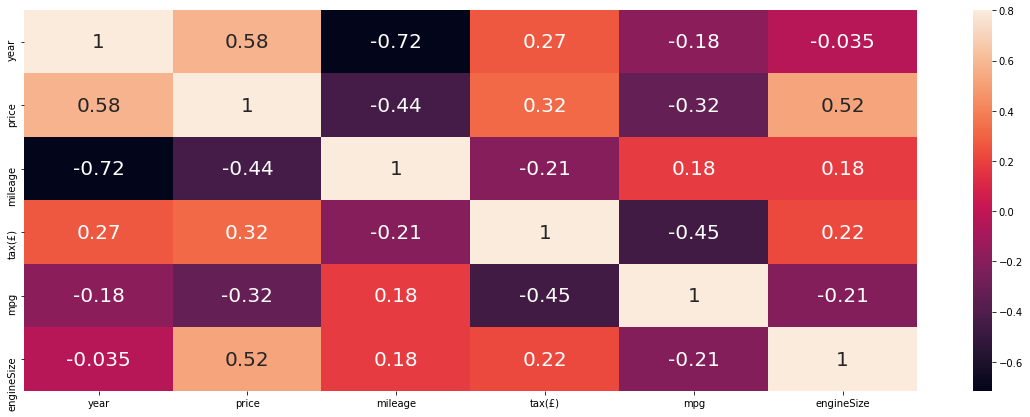

In [80]:
corr = data.corr()
f2, ax2 = plt.subplots(figsize=(20, 7))
sns.heatmap(corr, vmax=0.8,annot_kws={'size': 20}, annot=True)
plt.savefig('heatmap.png',bbox_inches='tight')


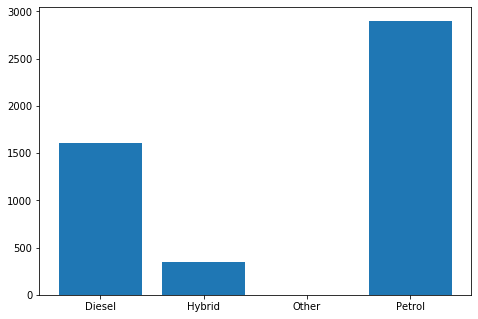

In [81]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fuel_type = ['Diesel','Hybrid','Other','Petrol']
fuel_type_c = list(data.groupby("fuelType").count()['year'].values)
ax.bar(fuel_type,fuel_type_c)
plt.show()

In [82]:
# Normalizing Features

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() 

data['scaled_mileage'] = rob_scaler.fit_transform(data['mileage'].values.reshape(-1,1))
data['scaled_mpg'] = rob_scaler.fit_transform(data['mpg'].values.reshape(-1,1))
data['scaled_price'] = rob_scaler.fit_transform(data['price'].values.reshape(-1,1))
data['scaled_engineSize'] = rob_scaler.fit_transform(data['engineSize'].values.reshape(-1,1))
data['scaled_tax(£)'] = rob_scaler.fit_transform(data['tax(£)'].values.reshape(-1,1))


In [83]:
data

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize,scaled_mileage,scaled_mpg,scaled_price,scaled_engineSize,scaled_tax(£)
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,-0.006850,0.228758,-0.516050,-0.8,0.00
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,0.343428,-0.777778,0.324422,0.8,4.50
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,0.902211,0.411765,-0.076418,0.2,-5.75
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,0.279612,0.307190,-0.710005,-1.2,-6.25
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,0.694501,-0.261438,-0.231582,0.8,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,0.373170,1.503268,-0.427994,0.0,-7.25
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,1.858161,0.673203,-0.537902,0.2,-5.75
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,-0.161395,0.307190,-0.667205,-1.2,-6.25
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,0.258576,-0.692810,0.259124,0.0,0.00


In [84]:
data_onehot = pd.get_dummies(data,columns=['model', 'transmission','fuelType'])

In [85]:
from sklearn.model_selection import train_test_split
X = data_onehot.drop(['price','mileage','mpg','engineSize','tax(£)','scaled_price'],axis=1)
y = data_onehot['scaled_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [86]:
X.columns

Index(['year', 'scaled_mileage', 'scaled_mpg', 'scaled_engineSize',
       'scaled_tax(£)', 'model_ Accent', 'model_ Amica', 'model_ Getz',
       'model_ I10', 'model_ I20', 'model_ I30', 'model_ I40', 'model_ I800',
       'model_ IX20', 'model_ IX35', 'model_ Ioniq', 'model_ Kona',
       'model_ Santa Fe', 'model_ Terracan', 'model_ Tucson',
       'model_ Veloster', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

# Visualization using PCA

Text(0, 0.5, 'Price')

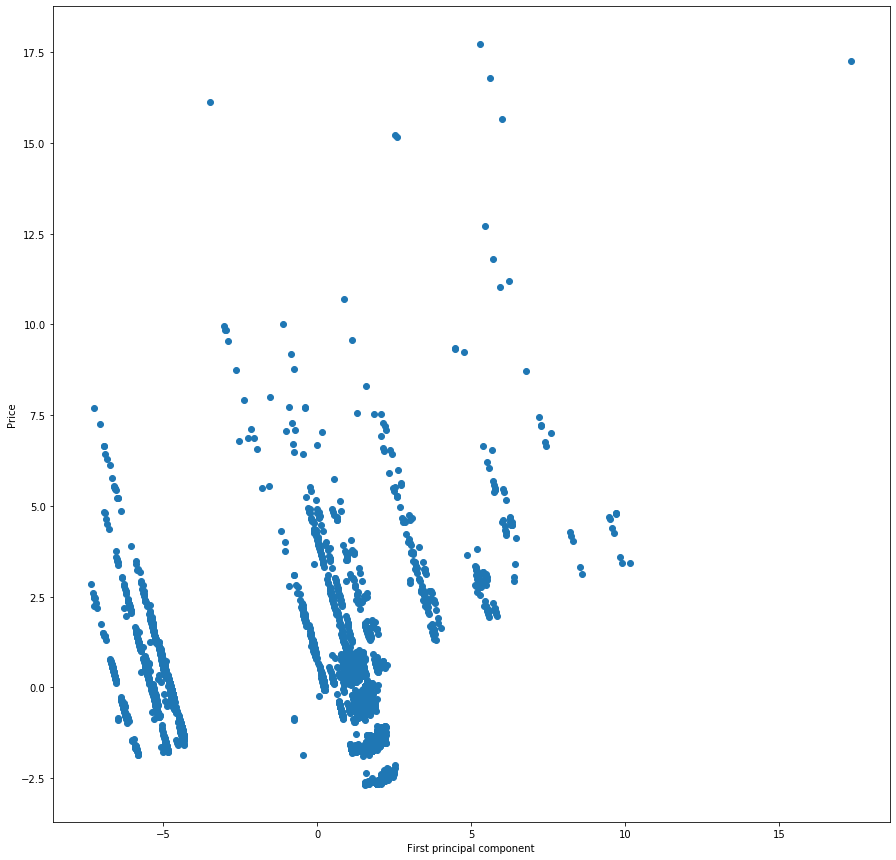

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.values)
x_pca = pca.transform(X.values)

plt.figure(figsize=(15,15))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Price')

# Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X,y)


0.8445445682151425

In [89]:
results = X_test.copy()
results["predicted"] = regressor.predict(X_test)
results["actual"]= y_test
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(2)
y_pred = regressor.predict(X_test)
results

,predicted,actual
1147,-0.18,-0.212058
1817,-0.23,-0.362049
241,-0.65,-0.606691
1678,-0.33,-0.412736
4696,-0.64,-0.662680
...,...,...
301,-0.41,-0.542040
163,-0.64,-0.516179
3909,0.09,0.073962
1984,0.19,0.297527


# Visualizing the Results

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0. In Scikit Learn it looks like:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 0.06
Coefficient of determination: 0.88


In [91]:
#Normalization

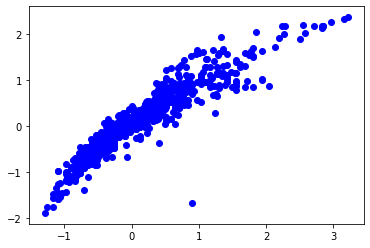

In [92]:
plt.scatter(y_test,y_pred , color='blue')


# Non Linear Regression

Decision Tree and Random Forest

In [93]:
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print(X_train.shape); print(X_test.shape)

(3888, 29)
(972, 29)


In [94]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=20, min_samples_leaf=0.15, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=0.15, random_state=3)

In [95]:

pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

# Code lines 4 to 6
pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))


0.5688943027753004
0.47956777402438233
0.5187682528959418
0.4749430915453823


In [96]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.09244828131734543
0.9862564573254669
0.15567862584878997
0.9527156335152075


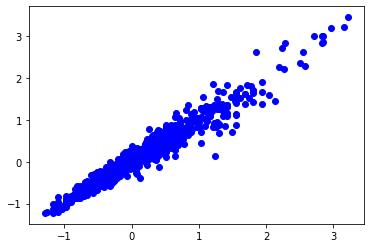

In [97]:
plt.scatter(y_test,pred_test_rf , color='blue')
